In [3]:
import numpy as np
import ray
import matplotlib.pyplot as plt
import time
from utils import *
from procedures import *
plt.rcParams["font.sans-serif"] = "DejaVu Sans"
plt.rcParams["mathtext.default"]  = "it"
plt.rcParams["mathtext.fontset"]  = "dejavusans"

In [4]:
num_cpus= 96
ray.shutdown()
ray.init(num_cpus=num_cpus, ignore_reinit_error=True)

2023-12-21 17:21:28,836	INFO worker.py:1544 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8269 


Python version:,3.9.13
Ray version:,2.3.0
Dashboard:,http://127.0.0.1:8269


In [5]:
seed = 20230731
np.random.seed(seed)
n_replications = 1000
 
min_power = 11
max_power = 16
base = 2

gamma = 0.1
var = 1
lamda = -1
varlow = 1
varhigh = 2

rng = np.random.default_rng(seed)

In [4]:
EFG_results = []
for power in np.arange(min_power, max_power+1):
    print("This problem has {} alternatives".format(base**power))
    EMIVgenerators =  [EMIVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    EMDVgenerators =  [EMDVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    generator_types = [EMIVgenerators, EMDVgenerators]
    
    for i, generators in enumerate(generator_types):
        print("----------------------------------Generator Type {}--------------------------------".format(i))
        n0 = 90
        ng = 10
        print("EFG")
        PCS, PGS = parallel_experiments(rng, generators, policy=EFG, remote_policy=remote_EFG, 
                                        args={"n0":n0, "ng":ng})
        EFG_results.append(PCS)
EFG_results

This problem has 2048 alternatives
----------------------------------Generator Type 0--------------------------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Jul 31 13:29:57 2023
PCS:0.681, PGS:0.681
Total time used: 4.191922664642334s, simulation ends at Mon Jul 31 13:30:01 2023
----------------------------------Generator Type 1--------------------------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Jul 31 13:30:01 2023
PCS:0.461, PGS:0.461
Total time used: 2.8557238578796387s, simulation ends at Mon Jul 31 13:30:04 2023
This problem has 4096 alternatives
----------------------------------Generator Type 0--------------------------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Jul 31 13:30:04 2023
PCS:0.653, PGS:0.653
Total time used: 5.778945446014404s, simulation ends at Mon Jul 31 13:30:10 2023
----------------------------------Gene

[0.681,
 0.461,
 0.653,
 0.479,
 0.656,
 0.477,
 0.654,
 0.461,
 0.674,
 0.484,
 0.671,
 0.469]

In [5]:
EFGPlus_results = []
for power in np.arange(min_power, max_power+1):
    
    print("This problem has {} alternatives".format(base**power))
    EMIVgenerators =  [EMIVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    EMDVgenerators =  [EMDVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    generator_types = [EMIVgenerators, EMDVgenerators]
    
    for i, generators in enumerate(generator_types):
        print("----------------------------------Generator Type {}--------------------------------".format(i))
        
        n0 = 70
        nsd = 20
        ng = 10
        G = 11
        print("EFGPlus")
        PCS, PGS = parallel_experiments(rng,  generators, policy=EFGPlus, remote_policy=remote_EFGPlus,
                                        args={"n0":n0, "nsd":nsd, "ng":ng, "G":G})
        EFGPlus_results.append(PCS)
        
EFGPlus_results

This problem has 2048 alternatives
----------------------------------Generator Type 0--------------------------------
EFGPlus
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Jul 31 13:40:41 2023
PCS:0.746, PGS:0.746
Total time used: 3.374809741973877s, simulation ends at Mon Jul 31 13:40:44 2023
----------------------------------Generator Type 1--------------------------------
EFGPlus
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Jul 31 13:40:44 2023
PCS:0.584, PGS:0.584
Total time used: 3.3466739654541016s, simulation ends at Mon Jul 31 13:40:47 2023
This problem has 4096 alternatives
----------------------------------Generator Type 0--------------------------------
EFGPlus
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Jul 31 13:40:48 2023
PCS:0.767, PGS:0.767
Total time used: 6.747740983963013s, simulation ends at Mon Jul 31 13:40:54 2023
--------------------------

[0.746,
 0.584,
 0.767,
 0.57,
 0.765,
 0.571,
 0.767,
 0.596,
 0.761,
 0.591,
 0.782,
 0.583]

In [6]:
FBKT_results = []
for power in np.arange(min_power, max_power+1):
    
    print("This problem has {} alternatives".format(base**power))
    EMIVgenerators =  [EMIVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    EMDVgenerators =  [EMDVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    generator_types = [EMIVgenerators, EMDVgenerators]
    
    for i, generators in enumerate(generator_types):
        print("----------------------------------Generator Type {}--------------------------------".format(i))
        
        n = 100
        print("FBKT")
        PCS, PGS = parallel_experiments(rng,  generators, policy=FBKT, remote_policy=remote_FBKT,
                                        args={"n":n})
        FBKT_results.append(PCS)
        
FBKT_results

This problem has 2048 alternatives
----------------------------------Generator Type 0--------------------------------
FBKT
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Jul 31 13:52:42 2023
PCS:0.558, PGS:0.558
Total time used: 0.7352309226989746s, simulation ends at Mon Jul 31 13:52:42 2023
----------------------------------Generator Type 1--------------------------------
FBKT
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Jul 31 13:52:43 2023
PCS:0.387, PGS:0.387
Total time used: 0.7172133922576904s, simulation ends at Mon Jul 31 13:52:43 2023
This problem has 4096 alternatives
----------------------------------Generator Type 0--------------------------------
FBKT
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Jul 31 13:52:44 2023
PCS:0.564, PGS:0.564
Total time used: 1.390362024307251s, simulation ends at Mon Jul 31 13:52:45 2023
----------------------------------

[0.558,
 0.387,
 0.564,
 0.423,
 0.562,
 0.405,
 0.565,
 0.393,
 0.573,
 0.402,
 0.6,
 0.4]

In [7]:
FBKTS_results = []
for power in np.arange(min_power, max_power+1):
    
    print("This problem has {} alternatives".format(base**power))
    EMIVgenerators =  [EMIVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    EMDVgenerators =  [EMDVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    generator_types = [EMIVgenerators, EMDVgenerators]
    
    for i, generators in enumerate(generator_types):
        print("----------------------------------Generator Type {}--------------------------------".format(i))
        
        nsd = 9
        n0 = 91
        
        print("FBKT_Seeding")
        PCS, PGS = parallel_experiments(rng,  generators, policy=FBKT, remote_policy=remote_FBKT, 
                                        args={"nsd":nsd, "n": n0, "seeding":True})
        FBKTS_results.append(PCS)
        
FBKTS_results

This problem has 2048 alternatives
----------------------------------Generator Type 0--------------------------------
FBKT_Seeding
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Jul 31 13:54:14 2023
PCS:0.732, PGS:0.732
Total time used: 1.0784363746643066s, simulation ends at Mon Jul 31 13:54:14 2023
----------------------------------Generator Type 1--------------------------------
FBKT_Seeding
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Jul 31 13:54:15 2023
PCS:0.548, PGS:0.548
Total time used: 1.0939750671386719s, simulation ends at Mon Jul 31 13:54:15 2023
This problem has 4096 alternatives
----------------------------------Generator Type 0--------------------------------
FBKT_Seeding
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Jul 31 13:54:16 2023
PCS:0.785, PGS:0.785
Total time used: 2.1207265853881836s, simulation ends at Mon Jul 31 13:54:18 2023
---------

[0.732,
 0.548,
 0.785,
 0.553,
 0.782,
 0.582,
 0.784,
 0.577,
 0.764,
 0.594,
 0.761,
 0.575]

In [8]:
ModifiedSH_results = []
for power in np.arange(min_power, max_power+1):
    
    print("This problem has {} alternatives".format(base**power))
    EMIVgenerators =  [EMIVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    EMDVgenerators =  [EMDVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    generator_types = [EMIVgenerators, EMDVgenerators]
    
    for i, generators in enumerate(generator_types):
        print("----------------------------------Generator Type {}--------------------------------".format(i))
        
        n = 100

        print("ModifiedSH")
        PCS, PGS = parallel_experiments(rng,  generators, policy=ModifiedSH, remote_policy=remote_ModifiedSH,  
                                        args={"n":n})
        ModifiedSH_results.append(PCS)
        
ModifiedSH_results

This problem has 2048 alternatives
----------------------------------Generator Type 0--------------------------------
ModifiedSH
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Jul 31 13:56:32 2023
PCS:0.512, PGS:0.512
Total time used: 0.7225501537322998s, simulation ends at Mon Jul 31 13:56:32 2023
----------------------------------Generator Type 1--------------------------------
ModifiedSH
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Jul 31 13:56:33 2023
PCS:0.339, PGS:0.339
Total time used: 0.7134270668029785s, simulation ends at Mon Jul 31 13:56:33 2023
This problem has 4096 alternatives
----------------------------------Generator Type 0--------------------------------
ModifiedSH
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Jul 31 13:56:34 2023
PCS:0.476, PGS:0.476
Total time used: 1.3447632789611816s, simulation ends at Mon Jul 31 13:56:34 2023
---------------

[0.512,
 0.339,
 0.476,
 0.337,
 0.489,
 0.359,
 0.517,
 0.328,
 0.473,
 0.335,
 0.484,
 0.309]

In [9]:
SH_results = []

for power in np.arange(min_power, max_power+1):
    
    print("This problem has {} alternatives".format(base**power))
    EMIVgenerators =  [EMIVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    EMDVgenerators =  [EMDVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    generator_types = [EMIVgenerators, EMDVgenerators]
    
    for i, generators in enumerate(generator_types):
        print("----------------------------------Generator Type {}--------------------------------".format(i))
        
        n = 100
        
        print("SH")
        PCS, PGS = parallel_experiments(rng,  generators, policy=SH, remote_policy=remote_SH,  args={"n":n})
        SH_results.append(PCS)
        
SH_results

This problem has 2048 alternatives
----------------------------------Generator Type 0--------------------------------
SH
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Jul 31 13:58:04 2023
PCS:0.837, PGS:0.837
Total time used: 0.7454788684844971s, simulation ends at Mon Jul 31 13:58:04 2023
----------------------------------Generator Type 1--------------------------------
SH
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Jul 31 13:58:05 2023
PCS:0.642, PGS:0.642
Total time used: 0.7283246517181396s, simulation ends at Mon Jul 31 13:58:05 2023
This problem has 4096 alternatives
----------------------------------Generator Type 0--------------------------------
SH
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Jul 31 13:58:06 2023
PCS:0.8, PGS:0.8
Total time used: 1.3955552577972412s, simulation ends at Mon Jul 31 13:58:07 2023
----------------------------------Generator

[0.837, 0.642, 0.8, 0.628, 0.774, 0.6, 0.77, 0.556, 0.759, 0.533, 0.747, 0.512]

In [ ]:
results_list = [EFG_results, FBKT_results, ModifiedSH_results, 
                EFGPlus_results, FBKTS_results, SH_results]

In [7]:
# results drawn from the above experiments for producing the Figure EC5

# results_list = [[0.681, 0.461, 0.653, 0.479, 0.656, 0.477, 0.654, 0.461, 0.674, 0.484, 0.671, 0.469],
#                 [0.558, 0.387, 0.564, 0.423, 0.562, 0.405, 0.565, 0.393, 0.573, 0.402, 0.6, 0.4],
#                 [0.512, 0.339, 0.476, 0.337, 0.489, 0.359, 0.517, 0.328, 0.473, 0.335, 0.484, 0.309],
# [0.746, 0.584, 0.767, 0.57, 0.765, 0.571, 0.767, 0.596, 0.761, 0.591, 0.782, 0.583],
# [0.732, 0.548, 0.785, 0.553, 0.782, 0.582, 0.784, 0.577, 0.764, 0.594, 0.761, 0.575],
# [0.837, 0.642, 0.8, 0.628, 0.774, 0.6, 0.77, 0.556, 0.759, 0.533, 0.747, 0.512]]

In [8]:
results_list = np.array(results_list)
results_list = results_list.reshape(6, max_power-min_power+1, 2)

In [9]:
labels =[
    "EFG",
    "FBKT",
    "Modified SH",
    "EFG$^{+}$",
    "FBKT-Seeding",
    "SH"
]

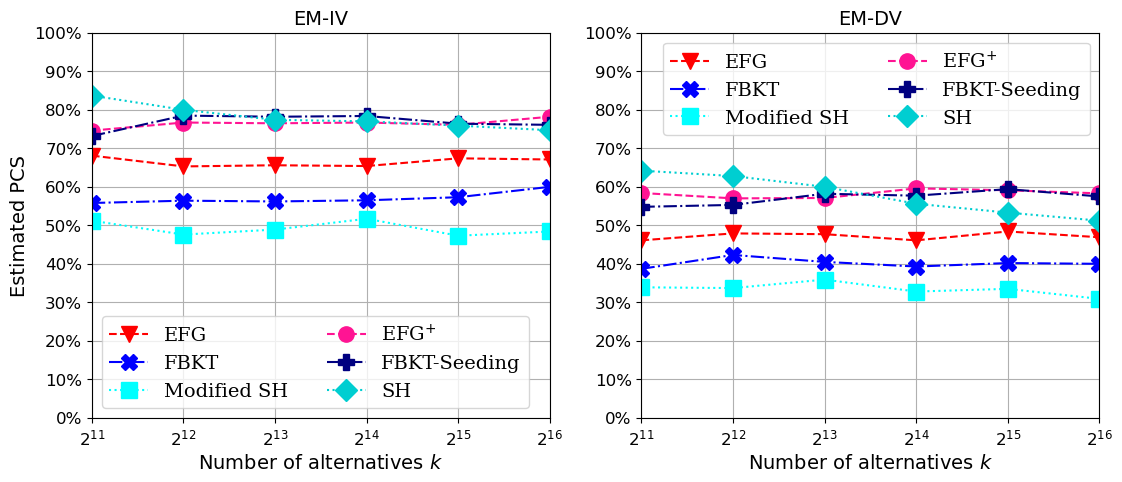

In [10]:
powers = np.arange(min_power, max_power+1)

fontsize=14

colors = ["red", 
"blue",

          "cyan",
                    "deeppink", 
"navy",
          "darkturquoise",


]
markers = ["v", "X", "s","o", "P",  "D"]
line_styles = ["--", "-.", ":","--", "-.", ":"]

fig = plt.figure(figsize=(13, 5))


fig_plots = [(1,2,1), (1, 2, 2)]

titles = ["EM-IV", "EM-DV"]


for i, fig_plot in enumerate(fig_plots):
    
    ax = fig.add_subplot(*fig_plots[i])
    
    results = results_list[:, :, i]

    for j, result in enumerate(results):
        plt.plot(powers, result, line_styles[j], markersize=11, color=colors[j], marker=markers[j], label=labels[j])

    plt.xlim(min_power, max_power)
    xticks = powers
    xticklabels = ["2^{"+str(power)+"}" for power in xticks]
    xticklabels = ["$"+power_label+"$" for power_label in xticklabels]
    plt.xticks(xticks, xticklabels, fontsize=fontsize-2)
    
    
    plt.ylim(0.0, 1)
    yticks = np.arange(0.0, 1+0.1, 0.1)
    yticklabels = ["%.0f"%(tick*100)+"%" for tick in yticks]
    plt.yticks(yticks, yticklabels, fontsize=fontsize-2)

    ax.legend(prop={'family': 'serif',"size":fontsize}, ncol=2)
    ax.set_xlabel("Number of alternatives $k$", size=fontsize)
    if i == 0 or i == 2:
        ax.set_ylabel("Estimated PCS", size=fontsize)
    plt.title(titles[i], fontsize=fontsize)
    plt.grid(0.2)

plt.show()

fig.savefig("Figure_EC5.pdf", bbox_inches='tight')